In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
#df = pd.read_csv(r"H:\DataScience\Assignment-1\IMDB Dataset.csv")
df = pd.read_csv("/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Data PreProcessing 

In [3]:
df.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [4]:
#df.info()
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [5]:
#print(len(df['review'][0]))
def no_of_words(text):
    word_count = []
    for w in text.split():
        word_count.append(w)
    wordlength = len(word_count)
    return wordlength

In [6]:
df['word length'] = df['review'].apply(no_of_words)
df.head()

,review,sentiment,word length
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


In [7]:
positive = df[df['sentiment']=='positive']
negative = df[df['sentiment']=='negative']

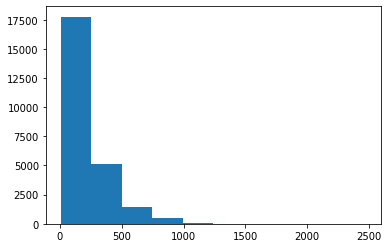

In [8]:
plt.hist(positive['word length'], bins = 10)
plt.show()

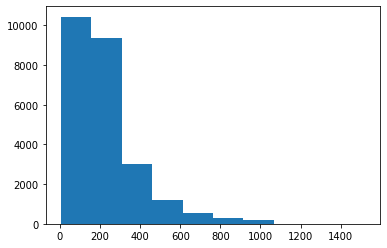

In [9]:
plt.hist(negative['word length'], bins = 10)
plt.show()

In [10]:
'''
let's review some positive and negative comments
'''
for i in positive.review[0:5]:
    print(i)
    print('*************************************************************************************************************')

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [11]:
for i in negative.review[0:5]:
    print(i)
    print("**********************************************************************************")

Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them.
**********************************************************************************
This show was an amazing, fresh & innovative idea in the 70's when it first aired. The first 7 or 8 years were brilliant, but things dropped off after that. By 1990, th

In [12]:
'''
data is evenly distributed amoung +ve and -ve sentiments
there is no null value
as an see there is some non-english words are used that shall be removed(eliminate the punctuation, URL, and @)
'''

'\ndata is evenly distributed amoung +ve and -ve sentiments\nthere is no null value\nas an see there is some non-english words are used that shall be removed(eliminate the punctuation, URL, and @)\n'

In [13]:
df.head()

,review,sentiment,word length
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


In [14]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


In [15]:
#df = pd.read_csv(r"H:\DataScience\Assignment-1\IMDB Dataset.csv")
df = pd.read_csv("/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [16]:
def review_cleaning(text):
    text = text.lower()
    text = text.split('.')
    text = ' '.join(text)
    text = re.sub(r"<br />|(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http+.?", "", text)
    text = word_tokenize(text)
    text = ' '.join(text)
    
    '''lemma = WordNetLemmatizer()
    word = []
    for i in text:
        w = lemma.lemmatize(i)
        word.append(w)    
    text = ''.join(word)'''
    
    return text

In [17]:
df.review = df['review'].apply(review_cleaning)
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


In [18]:
for i in df.review[:5]:
    print(i)
    print('****************************************************************************************')

one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to many aryans muslims gangstas latinos christians italians irish and more so scuffles death stares dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty pi

In [19]:
duplicate_count = df.review.duplicated().sum()
duplicate_count
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


In [20]:
df = df.drop_duplicates('review')
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


In [21]:
df.shape

(49579, 2)

df = pd.read_csv(r"H:\DataScience\Assignment-1\IMDB Dataset.csv")
df.head()

In [22]:
def sentiment_review(text):
    if text == 'positive':
        text = 1
    else:
        text = 0
    return text
    

In [23]:
df['sentiment'] = df.sentiment.apply(sentiment_review)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production the filming tech...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically theres a family where a little boy j...,0
4,petter matteis love in the time of money is a ...,1


# modeling

In [24]:
x = df['review']
y = df['sentiment']

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [26]:
'''
A Neural Network only accepts numeric data, so we need to encode the reviews. 
I use keras.preprocessing.text.Tokenizer to encode the reviews into integers, 
where each unique word is automatically indexed (using fit_on_texts method) based on x_train.
x_train and x_test is converted into integers using texts_to_sequences method.
'''

from keras.preprocessing.text import Tokenizer

token = Tokenizer(lower=False)
token.fit_on_texts(x_train)
x_train = token.texts_to_sequences(x_train)
x_test = token.texts_to_sequences(x_test)

len(x_train), len(x_test)

(39663, 9916)

In [27]:
'''
Each reviews has a different length, so we need to add padding (by adding 0) or truncating the words to the same length 
(in this case, it is the mean of all reviews length) using keras.preprocessing.sequence.pad_sequences.

post, pad or truncate the words in the back of a sentence
pre, pad or truncate the words in front of a sentence
'''

from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(x_train, maxlen=100, padding='post')
x_test = pad_sequences(x_test, maxlen=100, padding='post')

x_train.shape, x_test

((39663, 100), array([[  730,     7, 40515, ...,  1190,     3,  2347],
        [    2,  6617,    18, ...,     7,    10,   386],
        [  300,   296,    81, ...,     7,  1390, 24104],
        ...,
        [   16,   149,    24, ...,  4366,     3,  2845],
        [  742,   276,    15, ...,    21,    20,    68],
        [   10,   900,  1203, ...,   685,     0,     0]], dtype=int32))

In [28]:
'''
Embedding Layer: in simple terms, it creates word vectors of each word in the word_index 
and group words that are related or have similar meaning by analyzing other words around them.

LSTM Layer: to make a decision to KEEP or THROW AWAY data by considering the current input, previous output, and previous memory. 
There are some important components in LSTM.

Forget Gate:- decides information is to be kept or thrown away

Input Gate:- updates cell state by passing previous output and current input into sigmoid activation function

Cell State:- calculate new cell state, it is multiplied by forget vector (drop value if multiplied by a near 0), 
add it with the output from input gate to update the cell state value.

Ouput Gate:- decides the next hidden state and used for predictions

Dense Layer: compute the input with the weight matrix and bias (optional), and using an activation function. 
I use Sigmoid activation function for this work because the output is only 0 or 1.

The optimizer is Adam and the loss function is Binary Crossentropy because again the output is only 0 and 1, which is a binary number
'''

from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dropout, Dense
'''
model = Sequential([
    #Embedding(input_dim=10000, output_dim=32, input_length=100),
    LSTM(units = 32, activation='tanh'),
    #Dense(units=32, activation='sigmoid'),
    #Dropout(0.2),
    Dense(units=1, activation='sigmoid')
])
'''

model = Sequential()
model.add(Embedding(input_dim=200000, output_dim=128))
model.add(LSTM(units=128, activation='tanh'))
model.add(Dense(units=1, activation='sigmoid'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         25600000  
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 25,731,713
Trainable params: 25,731,713
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics=['accuracy'])

In [31]:
model.fit(x_train, y_train, epochs =5)

Epoch 1/5
1240/1240 [==============================] - 271s 217ms/step - loss: 0.3991 - accuracy: 0.8249
Epoch 2/5
1240/1240 [==============================] - 268s 216ms/step - loss: 0.2680 - accuracy: 0.8929
Epoch 3/5
1240/1240 [==============================] - 267s 215ms/step - loss: 0.2217 - accuracy: 0.9138
Epoch 4/5
1240/1240 [==============================] - 269s 217ms/step - loss: 0.1836 - accuracy: 0.9294
Epoch 5/5
1240/1240 [==============================] - 270s 218ms/step - loss: 0.1504 - accuracy: 0.9455


In [32]:
y_pred = model.predict(x_test)

y_pred, y_test

(array([[0.71143216],
        [0.7335962 ],
        [0.13140434],
        ...,
        [0.00561622],
        [0.0031155 ],
        [0.4410318 ]], dtype=float32), 25718    0
 42511    1
 33615    0
 147      1
 20415    0
         ..
 2691     0
 7837     0
 4814     0
 35456    0
 3446     0
 Name: sentiment, Length: 9916, dtype: int64)

In [34]:
y_pred = (model.predict(x_test)>0.5).astype('int32')
y_pred

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
a_s = accuracy_score(y_test, y_pred)
cm, a_s

(array([[4493,  420],
        [1142, 3861]]), 0.8424768051633723)